# Explore here

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [52]:
df = pd.read_csv("../data/raw/demographic_health_data.csv")
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [53]:
df.shape

(3140, 108)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [55]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [56]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [57]:
# Copia.
df_clean = df.copy()

# Eliminamos identificadores y columnas relacionadas con la variable objetivo
cols_to_drop = []

# Identificadores únicos
cols_to_drop += ['fips']

# Columnas con intervalos de confianza y valores absolutos que duplican información
cols_to_drop += [col for col in df.columns if "Lower 95%" in col or "Upper 95%" in col]
cols_to_drop += [col for col in df.columns if col.endswith("_number")]

# Columnas con valores absolutos donde ya hay porcentaje equivalente (por ejemplo, edades)
cols_to_drop += [
    col for col in df.columns 
    if any(s in col for s in ['0-9', '10-19', '20-29', '30-39', '40-49',
                              '50-59', '60-69', '70-79', '80+']) and not "% of" in col
]
# Eliminamos duplicados de la lista por si hay solapamientos
cols_to_drop = list(set(cols_to_drop))

# limpieza
df_clean.drop(columns=cols_to_drop, inplace=True)
print(f"Columnas eliminadas: {len(cols_to_drop)}")
print(f"Dimensiones resultantes: {df_clean.shape}")

Columnas eliminadas: 27
Dimensiones resultantes: (3140, 81)


Procedemos a dividr el dataset y entrenar modelos.

In [58]:
# Variable objetivo
y = df_clean["diabetes_prevalence"]

# Solo seleccionamos columnas numéricas
X = df_clean.drop(columns=["diabetes_prevalence"])
X = X.select_dtypes(include=["int64", "float64"])  # Ignora strings u objetos

# División en train y test (primero) <<<<<<<<<<<<<<<<<<< corregido ya que el escalado se producian antes.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado ajustado SOLO con datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Regresion lineal Base.

In [59]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("R² Regresión Lineal:", r2_score(y_test, y_pred_lr))

R² Regresión Lineal: 0.9657346079814628


In [60]:
# R² en entrenamiento para regresión lineal <<<<<<<<<<<<<< incorporado en correcion.
y_train_pred_lr = lr.predict(X_train_scaled)
print("R² Regresión Lineal (entrenamiento):", r2_score(y_train, y_train_pred_lr))

R² Regresión Lineal (entrenamiento): 0.965119461218844


Resgresion lasso con hoperparámetro por defecto

In [61]:
# Lasso (alpha=1.0 por defecto)
lasso_default = Lasso()
lasso_default.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_default.predict(X_test_scaled)
print("R² Lasso (alpha=1.0):", r2_score(y_test, y_pred_lasso))

R² Lasso (alpha=1.0): 0.7538045947423285


Evolución de R² con distintos valores de alpha

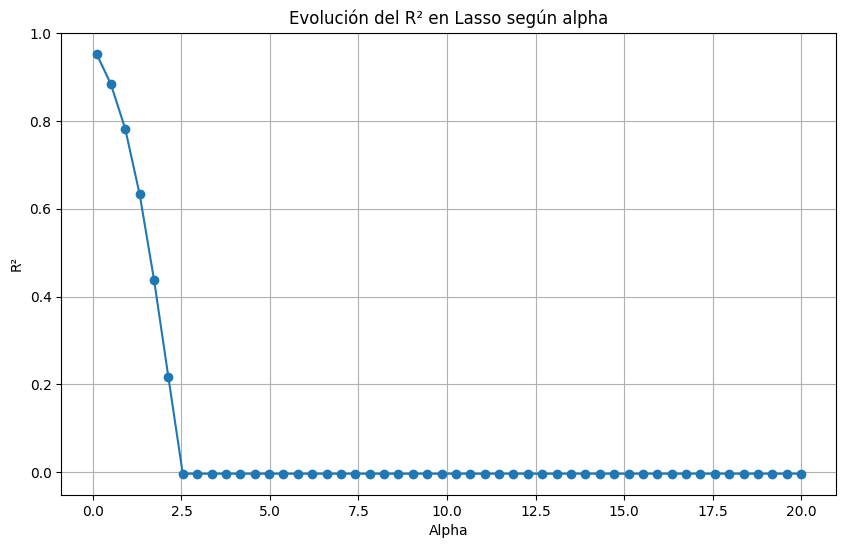

In [62]:
alphas = np.linspace(0.1, 20.0, 50)
r2_values = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    r2 = r2_score(y_test, lasso.predict(X_test_scaled))
    r2_values.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_values, marker="o")
plt.title("Evolución del R² en Lasso según alpha")
plt.xlabel("Alpha")
plt.ylabel("R²")
plt.grid(True)
plt.show()

Al aumentar el valor de alpha, el R² cae rápidamente y se mantiene cerca de cero, lo cual indica que el modelo se vuelve demasiado restringido y pierde capacidad predictiva.

Paso 4: Optimizacion del modelo Lasso.

In [63]:
param_grid = {"alpha": np.linspace(0.1, 20, 100)}
lasso = Lasso(max_iter=10000)
grid = GridSearchCV(lasso, param_grid, cv=5, scoring="r2")
grid.fit(X_train_scaled, y_train)

print("Mejor alpha:", grid.best_params_["alpha"])
print("Mejor R²:", grid.best_score_)

Mejor alpha: 0.1
Mejor R²: 0.9508077294052606


Un R² de 0.95 nos dice que el modelo Lasso con alpha = 0.1 es capaz de explicar el 95% de la variabilidad en la prevalencia de diabetes.

In [64]:
# Coeficientes del modelo final.
best_lasso = Lasso(alpha=0.1, max_iter=10000)
best_lasso.fit(X_train_scaled, y_train)

# R² en entrenamiento para el modelo final Lasso <<<<<<<<<<<<<<< Incorporado en correccion.
y_train_pred_lasso = best_lasso.predict(X_train_scaled)
print("R² Lasso (entrenamiento):", r2_score(y_train, y_train_pred_lasso))

# Obtener nombres de variables y sus coeficientes
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coeficiente": best_lasso.coef_
})
coef_df = coef_df.sort_values(by="Coeficiente", key=abs, ascending=False)
coef_df.head(10)

R² Lasso (entrenamiento): 0.9513441191356988


,Feature,Coeficiente
76,CKD_prevalence,1.419994
72,anycondition_prevalence,0.663034
36,Percent of adults with less than a high school...,0.240919
14,% Black-alone,0.219851
75,COPD_prevalence,0.179117
56,Active Patient Care Primary Care Physicians pe...,-0.123366
38,Percent of adults completing some college or a...,-0.107381
12,% White-alone,-0.096483
43,PCTPOV517_2018,0.061121
6,40-49 y/o % of total pop,0.007795


Estos coeficientes nos dicen qué variables están influyendo más en la predicción de la prevalencia de diabetes según tu modelo Lasso optimizado.
Variables con fuerte influencia positiva:
CKD_prevalence (1.43): Tiene el mayor coeficiente, mayor prevalencia de diabetes.
anycondition_prevalence (0.66): También fuerte, tiene sentido dado que mide condiciones crónicas.
% sin secundaria (0.24) y % Black-alone (0.22): Factores demográficos.

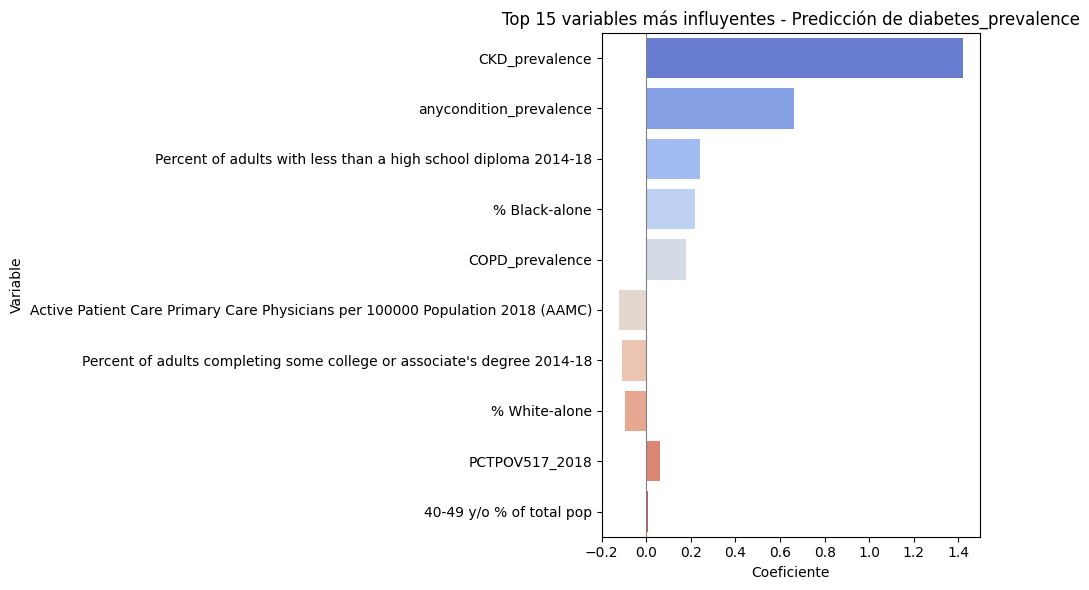

In [65]:
# Creamos el DataFrame de coeficientes
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": best_lasso.coef_
})

# Filtramos solo los coeficientes distintos de 0 y ordenamos por valor absoluto
top_features = coef_df[coef_df["Coeficiente"] != 0].copy()
top_features["abs_coef"] = top_features["Coeficiente"].abs()
top_features.sort_values("abs_coef", ascending=False, inplace=True)

# Visualizamos los 15 más influyentes
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_features.head(15),
    y="Variable",
    x="Coeficiente",
    hue="Variable",  # Asignamos hue para que el palette tenga contexto
    dodge=False,     # Evitamos separación por hue
    palette="coolwarm",
    legend=False     # No queremos leyenda duplicada
)
plt.title("Top 15 variables más influyentes - Predicción de diabetes_prevalence")
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()

Las variables más influyentes en la predicción de diabetes.
CKD_prevalence es la variable más influyente en la predicción de la prevalencia de diabetes.

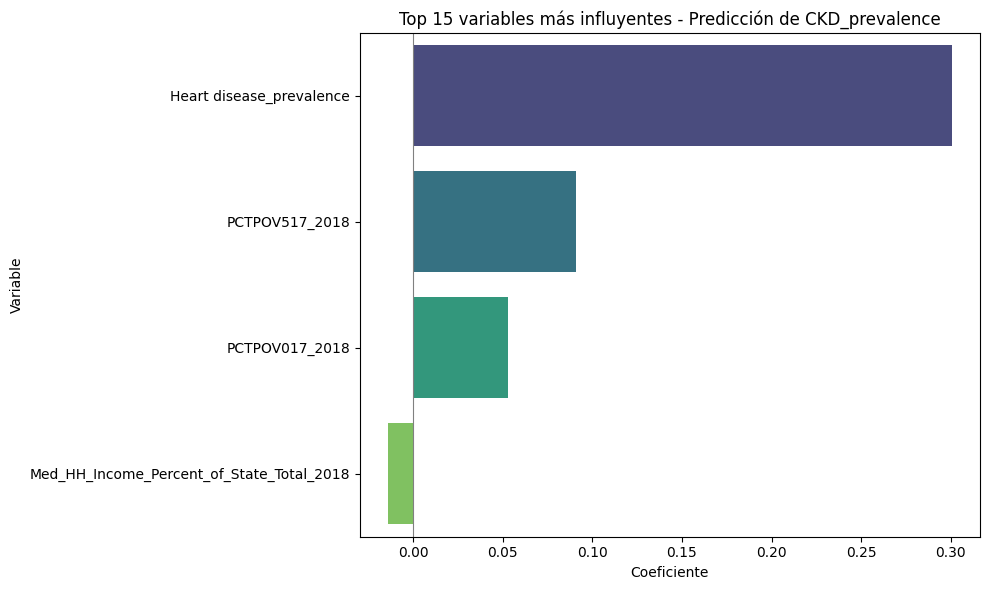

In [66]:
# Nuevo target
y_ckd = df_clean["CKD_prevalence"]

# Mismo conjunto de variables predictoras
X_ckd = df_clean.drop(columns=["CKD_prevalence", "diabetes_prevalence"])  # quitamos ambas por coherencia
X_ckd = X_ckd.select_dtypes(include=["float64", "int64"])

# Escalamos
X_ckd_scaled = scaler.fit_transform(X_ckd)

# Dividimos
X_train_ckd, X_test_ckd, y_train_ckd, y_test_ckd = train_test_split(
    X_ckd_scaled, y_ckd, test_size=0.2, random_state=42
)

# Entrenamos Lasso
lasso_ckd = Lasso(alpha=0.1, max_iter=10000)
lasso_ckd.fit(X_train_ckd, y_train_ckd)

# Coeficientes y visualización
coef_ckd = pd.DataFrame({
    "Variable": X_ckd.columns,
    "Coeficiente": lasso_ckd.coef_
})
coef_ckd = coef_ckd[coef_ckd["Coeficiente"] != 0]
coef_ckd["abs_coef"] = coef_ckd["Coeficiente"].abs()
coef_ckd.sort_values("abs_coef", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=coef_ckd.head(15),
    y="Variable",
    x="Coeficiente",
    hue="Variable",
    dodge=False,
    palette="viridis",
    legend=False 
)
plt.title("Top 15 variables más influyentes - Predicción de CKD_prevalence")
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()

Heart disease_prevalence esta cerca del 0.30, lo cual sugiere una fuerte relación directa entre enfermedades cardiovasculares y enfermedad renal crónica.

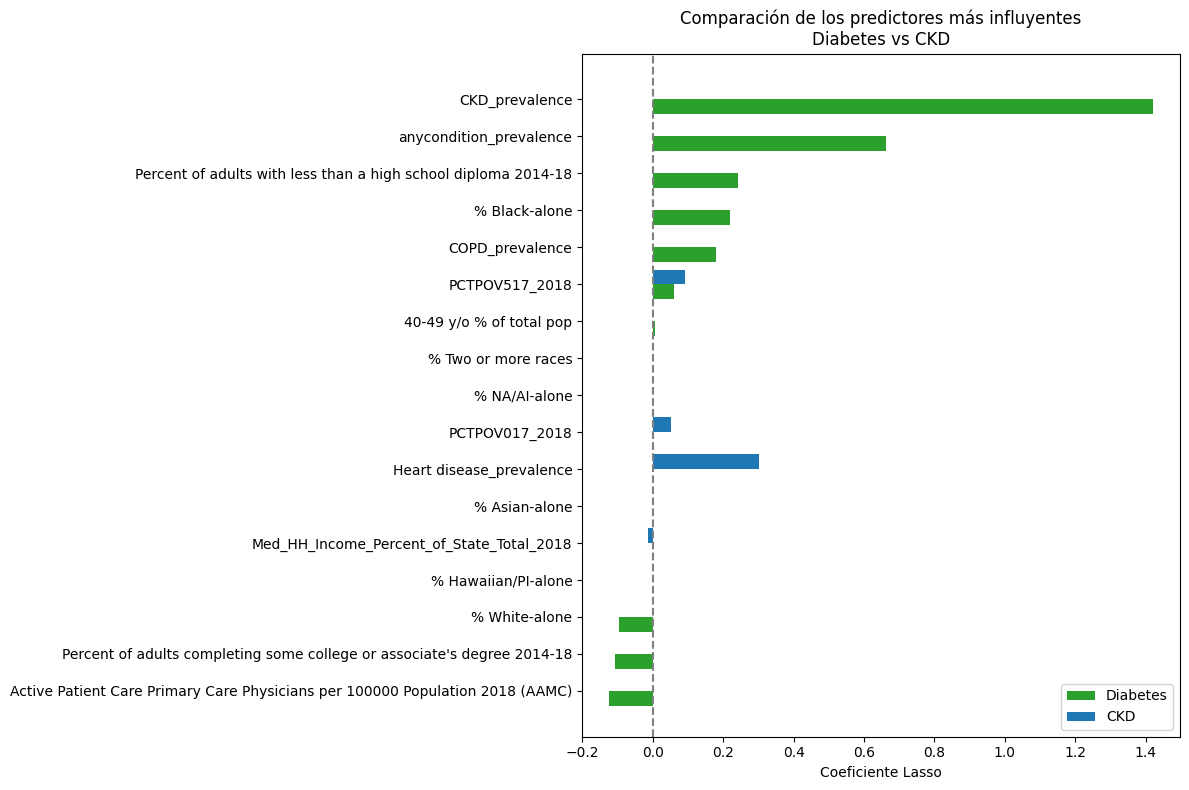

In [67]:
# Creamos una copia.
coef_diab = coef_df[["Variable", "Coeficiente"]].copy()
coef_diab.columns = ["Variable", "Coef_Diabetes"]

coef_ckd_plot = coef_ckd[["Variable", "Coeficiente"]].copy()
coef_ckd_plot.columns = ["Variable", "Coef_CKD"]

# Unimos ambos por nombre de variable
comparativa = pd.merge(coef_diab, coef_ckd_plot, on="Variable", how="outer").fillna(0)

# Calculamos importancia absoluta
comparativa["abs_diab"] = comparativa["Coef_Diabetes"].abs()
comparativa["abs_ckd"] = comparativa["Coef_CKD"].abs()

# Seleccionamos top 10 por cada modelo y combinamos
top_vars = (
    pd.concat([
        comparativa.nlargest(10, "abs_diab"),
        comparativa.nlargest(10, "abs_ckd")
    ])
    .drop_duplicates(subset=["Variable"])
)

# Ordenamos por contribución conjunta.
top_vars = top_vars.sort_values(by="Coef_Diabetes")

plt.figure(figsize=(12, 8))
bar_width = 0.4
indices = np.arange(len(top_vars))

plt.barh(indices, top_vars["Coef_Diabetes"], height=bar_width, label="Diabetes", color="#2ca02c")
plt.barh(indices + bar_width, top_vars["Coef_CKD"], height=bar_width, label="CKD", color="#1f77b4")

plt.yticks(indices + bar_width / 2, top_vars["Variable"])
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel("Coeficiente Lasso")
plt.title("Comparación de los predictores más influyentes\nDiabetes vs CKD")
plt.legend()
plt.tight_layout()
plt.show()

Gráfico comparativo entre los principales predictores de diabetes_prevalence y CKD_prevalence lado a lado, para ver visualmente qué factores comparten y en cuáles difieren.
Una visión clara de qué predictores son compartidos, cuáles son más específicos de cada enfermedad.

CKD_prevalence y anycondition_prevalence son fuertes predictores para ambas enfermedades.

Heart disease_prevalence se destaca especialmente como predictor de CKD. Enfermedades cardiovasculares o renales???.